In [75]:
%config IPCompleter.greedy=True
%matplotlib inline

import pandas as pd

df_train = pd.read_csv('train_kaggle.csv')
df_test = pd.read_csv('sample_solution.csv')
y = df_train['label']

In [76]:
def load_dataframe(id):
    train_data = np.load("train/train/{}.npy".format(id))
    return train_data

def load_dataframe_test(id):
    test_data = np.load("test/test/{}.npy".format(id))
    return test_data

def replace_nan(df):
    #Obtain mean of columns as you need, nanmean is just convenient.
    col_mean = np.nanmean(df, axis=0)

    #Find indicies that you need to replace
    inds = np.where(np.isnan(df))

    #Place column means in the indices. Align the arrays using take
    df[inds] = np.take(col_mean, inds[1])
    return df

def compute_features(df):
    sumCol = np.sum(df, axis=0).reshape(1, -1)
    meanCol = np.mean(df, axis=0).reshape(1, -1)
    dataCol = np.concatenate([sumCol, meanCol], axis=1)
    # dataCol = sumCol
    return dataCol

In [77]:
import numpy as np
replace_nan(load_dataframe(0)).shape

C:\Users\jw.chan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()


(54, 40)

In [78]:
import numpy as np
from tqdm import tqdm

XTrain = []
for id in tqdm(df_train['Id']):
    dfi = compute_features(replace_nan(load_dataframe(id)))
    XTrain.append(dfi)

XTrain = np.concatenate(XTrain, axis=0)
XTrain.shape

  0%|                                         | 0/30336 [00:00<?, ?it/s]C:\Users\jw.chan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()
100%|████████████████████████████| 30336/30336 [01:40<00:00, 302.69it/s]


(30336, 80)

In [79]:
from tqdm import tqdm

XTest = []
for id in tqdm(df_test['Id']):
    dfi = compute_features(replace_nan(load_dataframe_test(id)))
    XTest.append(dfi)
XTest = np.concatenate(XTest, axis=0)
XTest.shape

  0%|                                         | 0/10000 [00:00<?, ?it/s]C:\Users\jw.chan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()
100%|████████████████████████████| 10000/10000 [00:28<00:00, 345.19it/s]


(10000, 80)

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(XTrain, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(24268, 80)
(6068, 80)
(24268,)
(6068,)


In [81]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn import metrics

model = LGBMClassifier()
model.fit(X_train, y_train)
pred = model.predict_proba(X_valid)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_valid, pred)
auc_score = metrics.auc(fpr, tpr)
auc_score

0.9256021796607274

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

def get_column_names():
    columnNames = []
    for i in range(40):
        columnNames.append(str(i) + '_sum')
        columnNames.append(str(i) + '_mean')
    return columnNames

def plot_corr(df):
    # Compute the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

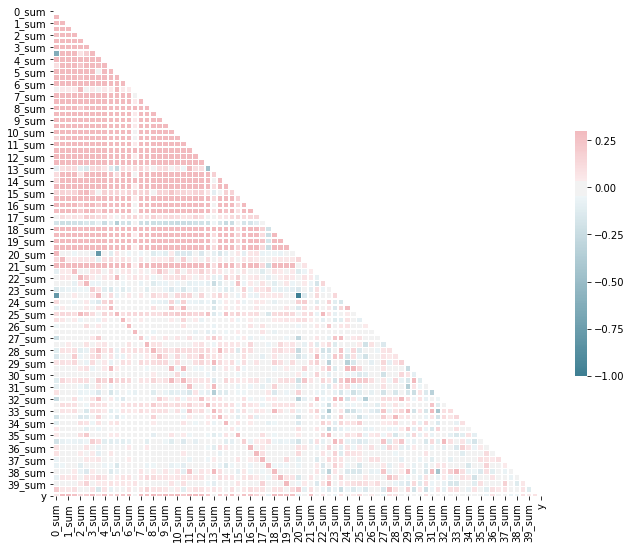

In [85]:
df = pd.DataFrame(data=XTrain, columns=get_column_names())
df['y'] = y
plot_corr(df)

In [86]:
df.corr()['y']

0_sum      0.053402
0_mean     0.284415
1_sum      0.288035
1_mean     0.252277
2_sum      0.128515
2_mean     0.198399
3_sum      0.266281
3_mean     0.115516
4_sum      0.267759
4_mean     0.140847
5_sum      0.197432
5_mean     0.226264
6_sum      0.258232
6_mean     0.011289
7_sum      0.268055
7_mean     0.264109
8_sum      0.331926
8_mean     0.237338
9_sum      0.316417
9_mean     0.264366
10_sum     0.354801
10_mean    0.215275
11_sum     0.295596
11_mean    0.310958
12_sum     0.277272
12_mean    0.216466
13_sum     0.030970
13_mean    0.204316
14_sum     0.153996
14_mean    0.255227
             ...   
25_mean    0.005317
26_sum     0.036915
26_mean   -0.002019
27_sum    -0.059756
27_mean    0.101850
28_sum     0.076331
28_mean   -0.039705
29_sum     0.018557
29_mean    0.026114
30_sum     0.011268
30_mean    0.096006
31_sum    -0.008929
31_mean    0.007044
32_sum    -0.037695
32_mean   -0.016582
33_sum     0.010033
33_mean   -0.002238
34_sum    -0.002141
34_mean    0.017844


In [87]:
df.corr()['y'].sort_values(ascending=False)

y          1.000000
10_sum     0.354801
8_sum      0.331926
9_sum      0.316417
11_mean    0.310958
11_sum     0.295596
18_sum     0.288743
1_sum      0.288035
0_mean     0.284415
12_sum     0.277272
7_sum      0.268055
4_sum      0.267759
3_sum      0.266281
9_mean     0.264366
7_mean     0.264109
18_mean    0.262882
15_mean    0.261804
19_mean    0.259579
6_sum      0.258232
14_mean    0.255227
1_mean     0.252277
21_sum     0.247820
19_sum     0.244829
16_sum     0.240305
8_mean     0.237338
5_mean     0.226264
12_mean    0.216466
10_mean    0.215275
13_mean    0.204316
2_mean     0.198399
             ...   
13_sum     0.030970
37_sum     0.029514
29_mean    0.026114
36_mean    0.020602
35_sum     0.020180
29_sum     0.018557
34_mean    0.017844
20_mean    0.017232
6_mean     0.011289
30_sum     0.011268
33_sum     0.010033
31_mean    0.007044
25_mean    0.005317
22_mean    0.003575
26_mean   -0.002019
34_sum    -0.002141
33_mean   -0.002238
24_sum    -0.005488
31_sum    -0.008929
